# ***深度学习的实用层面***

# 1. 训练集/验证集/测试集

① 选择最佳的训练集（Training sets）、验证集（Development sets）、测试集（Test sets）对神经网络的性能影响非常重要。

② 除此之外，在构建一个神经网络的时候，我们需要设置许多参数，例如神经网络的层数、每个隐藏层包含的神经元个数、学习因子（学习速率）、激活函数的选择等等。

① 实际上很难在第一次设置的时候就选择到这些最佳的参数，而是需要通过不断地迭代更新来获得。

② 这个循环迭代的过程是这样的：我们先有个想法Idea，先选择初始的参数值，构建神经网络模型结构；然后通过代码Code的形式，实现这个神经网络；最后，通过实验Experiment验证这些参数对应的神经网络的表现性能。

③ 根据验证结果，我们对参数进行适当的调整优化，再进行下一次的Idea->Code->Experiment循环。通过很多次的循环，不断调整参数，选定最佳的参数值，从而让神经网络性能最优化。

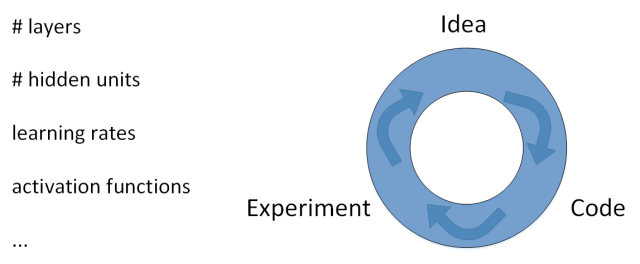

① 深度学习已经应用于许多领域中，比如NLP，CV，Speech Recognition等等。

② 通常来说，最适合某个领域的深度学习网络往往不能直接应用在其它问题上。解决不同问题的最佳选择是根据样本数量、输入特征数量和电脑配置信息（GPU或者CPU）等，来选择最合适的模型。

③ 即使是最有经验的深度学习专家也很难第一次就找到最合适的参数。

④ 因此，应用深度学习是一个反复迭代的过程，需要通过反复多次的循环训练得到最优化参数。

⑤ 决定整个训练过程快慢的关键在于单次循环所花费的时间，单次循环越快，训练过程越快。而设置合适的Train/Dev/Test sets数量，能有效提高训练效率。

① 一般地，我们将所有的样本数据分成三个部分：Train/Dev/Test sets。

② 训练集（Train sets）用来训练你的算法模型；验证集（Dev sets）用来验证不同算法的表现情况，从中选择最好的算法模型；测试集（Test sets）用来测试最好算法的实际表现，作为该算法的无偏估计。

① 之前人们通常设置Train sets和Test sets的数量比例为70%和30%。如果有Dev sets，则设置比例为60%、20%、20%，分别对应Train/Dev/Test sets。

② 这种比例分配在样本数量不是很大的情况下，例如100,1000,10000，是比较科学的。但是如果数据量很大的时候，例如100万，这种比例分配就不太合适了。科学的做法是要将Dev sets和Test sets的比例设置得很低。

③ 因为Dev sets的目标是用来比较验证不同算法的优劣，从而选择更好的算法模型就行了。因此，通常不需要所有样本的20%这么多的数据来进行验证。

④ 对于100万的样本，往往只需要10000个样本来做验证就够了。Test sets也是一样，目标是测试已选算法的实际表现，无偏估计。对于100万的样本，往往也只需要10000个样本就够了。

⑤ 因此，对于大数据样本，Train/Dev/Test sets的比例通常可以设置为98%/1%/1%，或者99%/0.5%/0.5%。样本数据量越大，相应的Dev/Test sets的比例可以设置的越低一些。

① 现代深度学习还有个重要的问题就是训练样本和测试样本分布上不匹配，意思是训练样本和测试样本来自于不同的分布。

② 举个例子，假设你开发一个手机app，可以让用户上传图片，然后app识别出猫的图片。在app识别算法中，你的训练样本可能来自网络下载，而你的验证和测试样本可能来自不同用户的上传。

③ 从网络下载的图片一般像素较高而且比较正规，而用户上传的图片往往像素不稳定，且图片质量不一。

④ 因此，训练样本和验证/测试样本可能来自不同的分布。解决这一问题的比较科学的办法是尽量保证Dev sets和Test sets来自于同一分布。

⑤ 值得一提的是，训练样本非常重要，通常我们可以将现有的训练样本做一些处理，例如图片的翻转、假如随机噪声等，来扩大训练样本的数量，从而让该模型更加强大。

⑥ 即使Train sets和Dev/Test sets不来自同一分布，使用这些技巧也能提高模型性能。

① 最后提一点的是如果没有Test sets也是没有问题的。Test sets的目标主要是进行无偏估计。

② 我们可以通过Train sets训练不同的算法模型，然后分别在Dev sets上进行验证，根据结果选择最好的算法模型。这样也是可以的，不需要再进行无偏估计了。

③ 如果只有Train sets和Dev sets，通常也有人把这里的Dev sets称为Test sets，我们要注意加以区别。

# 2. 偏差/方差

① 偏差（Bias）和方差（Variance）是机器学习领域非常重要的两个概念和需要解决的问题。

② 在传统的机器学习算法中，Bias和Variance是对立的，分别对应着欠拟合和过拟合，我们常常需要在Bias和Variance之间进行权衡。

③ 而在深度学习中，我们可以同时减小Bias和Variance，构建最佳神经网络模型。

④ 如下图所示，显示了二维平面上，high bias，just right，high variance的例子。可见，high bias对应着欠拟合，而high variance对应着过拟合。

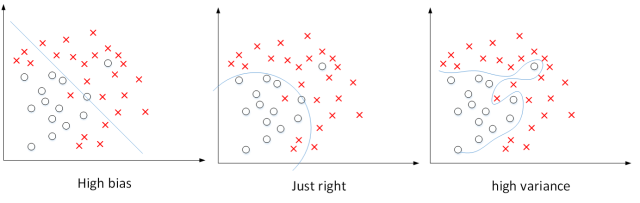

① 上图这个例子中输入特征是二维的，high bias和high variance可以直接从图中分类线看出来。而对于输入特征是高维的情况，如何来判断是否出现了high bias或者high variance呢？

② 例如猫识别问题，输入是一幅图像，其特征维度很大。这种情况下，我们可以通过两个数值Train set error和Dev set error来理解bias和variance。

③ 假设Train set error为1%，而Dev set error为11%，即该算法模型对训练样本的识别很好，但是对验证集的识别却不太好。这说明了该模型对训练样本可能存在过拟合，模型泛化能力不强，导致验证集识别率低。这恰恰是high variance的表现。

④ 假设Train set error为15%，而Dev set error为16%，虽然二者error接近，即该算法模型对训练样本和验证集的识别都不是太好。这说明了该模型对训练样本存在欠拟合。这恰恰是high bias的表现。

⑤ 假设Train set error为15%，而Dev set error为30%，说明了该模型既存在high bias也存在high variance（深度学习中最坏的情况）。再假设Train set error为0.5%，而Dev set error为1%，即low bias和low variance，是最好的情况。

⑥ 值得一提的是，以上的这些假设都是建立在base error是0的基础上，即人类都能正确识别所有猫类图片。base error不同，相应的Train set error和Dev set error会有所变化，但没有相对变化。

① 一般来说，Train set error体现了是否出现bias，Dev set error体现了是否出现variance（正确地说，应该是Dev set error与Train set error的相对差值）。

② 我们已经通过二维平面展示了high bias或者high variance的模型，下图展示了high bias and high variance的模型：

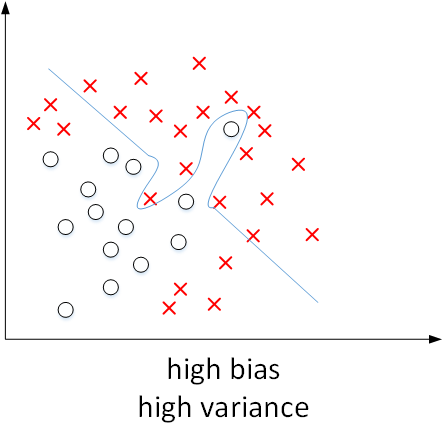

③ 模型既存在high bias也存在high variance，可以理解成某段区域是欠拟合的，某段区域是过拟合的。

① 机器学习中基本的一个诀窍就是避免出现high bias和high variance。

② 首先，减少high bias的方法通常是增加神经网络的隐藏层个数、神经元个数，训练时间延长，选择其它更复杂的NN模型等。

③ 在base error不高的情况下，一般都能通过这些方式有效降低和避免high bias，至少在训练集上表现良好。

④ 其次，减少high variance的方法通常是增加训练样本数据，进行正则化Regularization，选择其他更复杂的NN模型等。

① 这里有几点需要注意的。

② 第一，解决high bias和high variance的方法是不同的。实际应用中通过Train set error和Dev set error判断是否出现了high bias或者high variance，然后再选择针对性的方法解决问题。

③ 第二，Bias和Variance的折中权衡。传统机器学习算法中，Bias和Variance通常是对立的，减小Bias会增加Variance，减小Variance会增加Bias。而在现在的深度学习中，通过使用更复杂的神经网络和海量的训练样本，一般能够同时有效减小Bias和Variance。这也是深度学习之所以如此强大的原因之一。

# 3. 正则化

① 如果出现了过拟合，即high variance，则需要采用正则化（regularization）来解决。

② 虽然扩大训练样本数量也是减小high variance的一种方法，但是通常获得更多训练样本的成本太高，比较困难。所以，更可行有效的办法就是使用regularization。

① 我们先来回顾一下之前介绍的Logistic regression。采用L2 regularization，其表达式为：

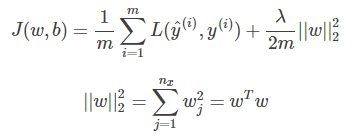

② 这里有个问题：为什么只对w进行正则化而不对b进行正则化呢？其实也可以对b进行正则化。

③ 但是一般w的维度很大，而b只是一个常数。相比较来说，参数很大程度上由w决定，改变b值对整体模型影响较小。所以，一般为了简便，就忽略对b的正则化了。

① 除了L2 regularization之外，还有另外一只正则化方法：L1 regularization。其表达式为：

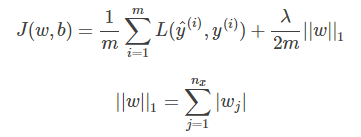

② 与L2 regularization相比，L1 regularization得到的w更加稀疏，即很多w为零值。其优点是节约存储空间，因为大部分w为0。

③ 然而，实际上L1 regularization在解决high variance方面比L2 regularization并不更具优势。

④ 而且，L1的在微分求导方面比较复杂。所以，一般L2 regularization更加常用。

① L1、L2 regularization中的λ就是正则化参数（超参数的一种）。可以设置λ为不同的值，在Dev set中进行验证，选择最佳的λ。

② 顺便提一下，在python中，由于lambda是保留字，所以为了避免冲突，我们使用lambd来表示λ。

① 在深度学习模型中，L2 regularization的表达式为：

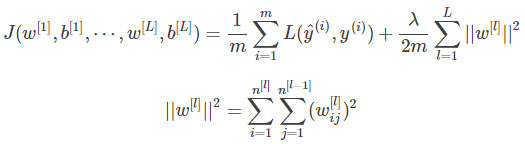

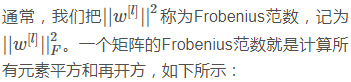

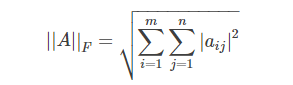

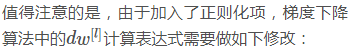

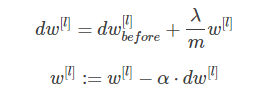

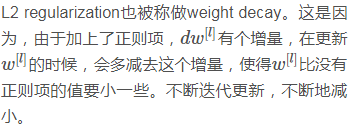

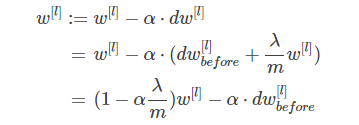

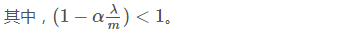

① 为什么正则化能够有效避免high variance，防止过拟合呢？下面我们通过几个例子说明。

② 还是之前那张图，从左到右，分别表示了欠拟合，刚好拟合，过拟合三种情况。

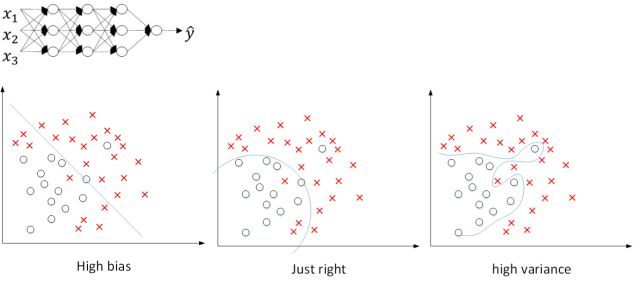

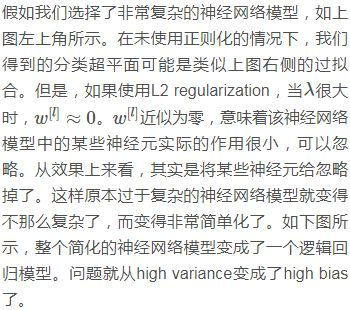

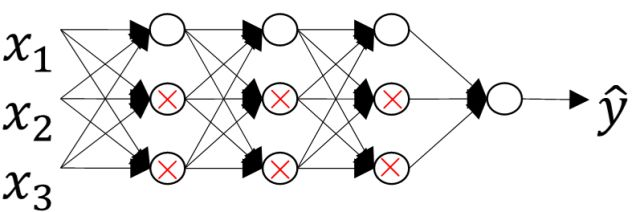

③ 因此，选择合适大小的λ值，就能够同时避免high bias和high variance，得到最佳模型。

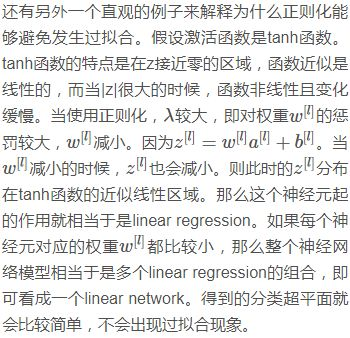

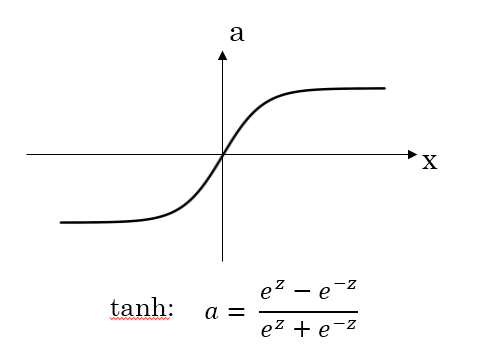

# 4. Dropout

① 除了L2 regularization之外，还有另外一种防止过拟合的有效方法：Dropout。

② Dropout是指在深度学习网络的训练过程中，对于每层的神经元，按照一定的概率将其暂时从网络中丢弃。也就是说，每次训练时，每一层都有部分神经元不工作，起到简化复杂网络模型的效果，从而避免发生过拟合。

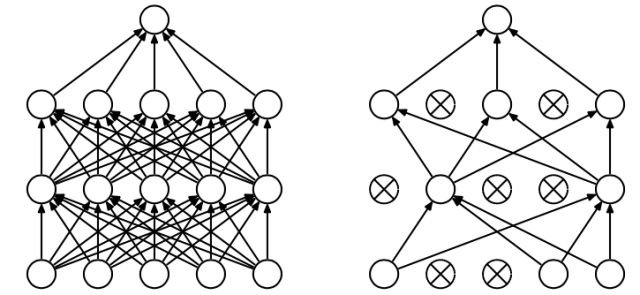

① Dropout有不同的实现方法，接下来介绍一种常用的方法：Inverted dropout。假设对于第l层神经元，设定保留神经元比例概率keep_prob=0.8，即该层有20%的神经元停止工作。

② dl为dropout向量，设置dl为随机vector，其中80%的元素为1，20%的元素为0。在python中可以使用如下语句生成dropout vector：

In [ ]:
dl = np.random.rand(al.shape[0],al.shape[1])<keep_prob

③ 然后，第l层经过dropout，随机删减20%的神经元，只保留80%的神经元，其输出为：

In [ ]:
al = np.multiply(al,dl)

④ 最后，还要对al进行scale up处理，即：

In [ ]:
al /= keep_prob

⑤ 以上就是Inverted dropout的方法。之所以要对al进行scale up是为了保证在经过dropout后，al作为下一层神经元的输入值尽量保持不变。

⑥ 假设第l层有50个神经元，经过dropout后，有10个神经元停止工作，这样只有40神经元有作用。

⑦ 那么得到的al只相当于原来的80%。scale up后，能够尽可能保持al的期望值相比之前没有大的变化。

① Inverted dropout的另外一个好处就是在对该dropout后的神经网络进行测试时能够减少scaling问题。

② 因为在训练时，使用scale up保证al的期望值没有大的变化，测试时就不需要再对样本数据进行类似的尺度伸缩操作了。

① 对于m个样本，单次迭代训练时，随机删除掉隐藏层一定数量的神经元；然后，在删除后的剩下的神经元上正向和反向更新权重w和常数项b；接着，下一次迭代中，再恢复之前删除的神经元，重新随机删除一定数量的神经元，进行正向和反向更新w和b。不断重复上述过程，直至迭代训练完成。

② 值得注意的是，使用dropout训练结束后，在测试和实际应用模型时，不需要进行dropout和随机删减神经元，所有的神经元都在工作。

① Dropout通过每次迭代训练时，随机选择不同的神经元，相当于每次都在不同的神经网络上进行训练，类似机器学习中Bagging的方法（三个臭皮匠，赛过诸葛亮），能够防止过拟合。

② 除此之外，还可以从权重w的角度来解释为什么dropout能够有效防止过拟合。

③ 对于某个神经元来说，某次训练时，它的某些输入在dropout的作用被过滤了。而在下一次训练时，又有不同的某些输入被过滤。经过多次训练后，某些输入被过滤，某些输入被保留。

④ 这样，该神经元就不会受某个输入非常大的影响，影响被均匀化了。也就是说，对应的权重w不会很大。

⑤ 这从效果上来说，与L2 regularization是类似的，都是对权重w进行“惩罚”，减小了w的值。

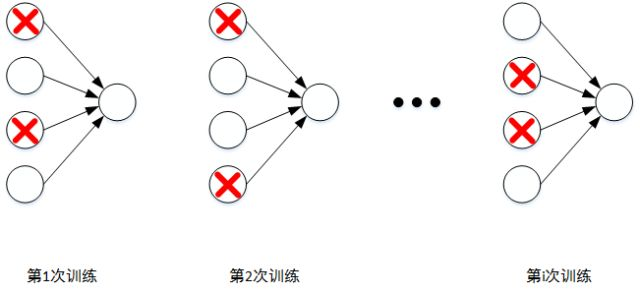

① 总结一下，对于同一组训练数据，利用不同的神经网络训练之后，求其输出的平均值可以减少overfitting。

② Dropout就是利用这个原理，每次丢掉一定数量的隐藏层神经元，相当于在不同的神经网络上进行训练，这样就减少了神经元之间的依赖性，即每个神经元不能依赖于某几个其他的神经元（指层与层之间相连接的神经元），使神经网络更加能学习到与其他神经元之间的更加健壮robust的特征。

① 在使用dropout的时候，有几点需要注意。

② 首先，不同隐藏层的dropout系数keep_prob可以不同。一般来说，神经元越多的隐藏层，keep_out可以设置得小一些，例如0.5；神经元越少的隐藏层，keep_out可以设置的大一些，例如0.8，设置是1。

③ 另外，实际应用中，不建议对输入层进行dropout，如果输入层维度很大，例如图片，那么可以设置dropout，但keep_out应设置的大一些，例如0.8，0.9。

④ 总体来说，就是越容易出现overfitting的隐藏层，其keep_prob就设置的相对小一些。没有准确固定的做法，通常可以根据validation进行选择。

① Dropout在电脑视觉CV领域应用比较广泛，因为输入层维度较大，而且没有足够多的样本数量。

② 值得注意的是dropout是一种regularization技巧，用来防止过拟合的，最好只在需要regularization的时候使用dropout。

③ 使用dropout的时候，可以通过绘制cost function来进行debug，看看dropout是否正确执行。一般做法是，将所有层的keep_prob全设置为1，再绘制cost function，即涵盖所有神经元，看J是否单调下降。下一次迭代训练时，再将keep_prob设置为其它值。

# 5. 数据增强

① 除了L2 regularization和dropout regularization之外，还有其它减少过拟合的方法。

② 其中一种方法是增加训练样本数量。但是通常成本较高，难以获得额外的训练样本。但是，我们可以对已有的训练样本进行一些处理来“制造”出更多的样本，称为data augmentation。

③ 例如图片识别问题中，可以对已有的图片进行水平翻转、垂直翻转、任意角度旋转、缩放或扩大等等。

④ 如下图所示，这些处理都能“制造”出新的训练样本。虽然这些是基于原有样本的，但是对增大训练样本数量还是有很有帮助的，不需要增加额外成本，却能起到防止过拟合的效果。

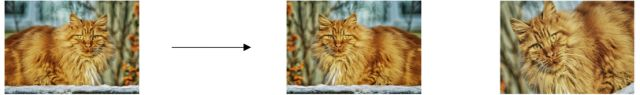

⑤ 在数字识别中，也可以将原有的数字图片进行任意旋转或者扭曲，或者增加一些noise，如下图所示：

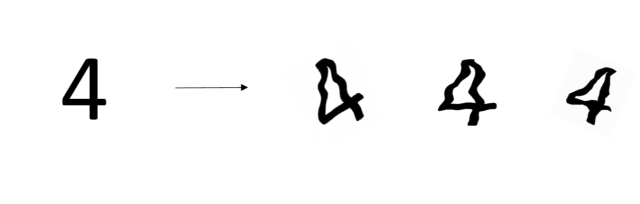

# 6. early stopping

① 还有另外一种防止过拟合的方法：early stopping。

② 一个神经网络模型随着迭代训练次数增加，train set error一般是单调减小的，而dev set error 先减小，之后又增大。

③ 也就是说训练次数过多时，模型会对训练样本拟合的越来越好，但是对验证集拟合效果逐渐变差，即发生了过拟合。

④ 因此，迭代训练次数不是越多越好，可以通过train set error和dev set error随着迭代次数的变化趋势，选择合适的迭代次数，即early stopping。

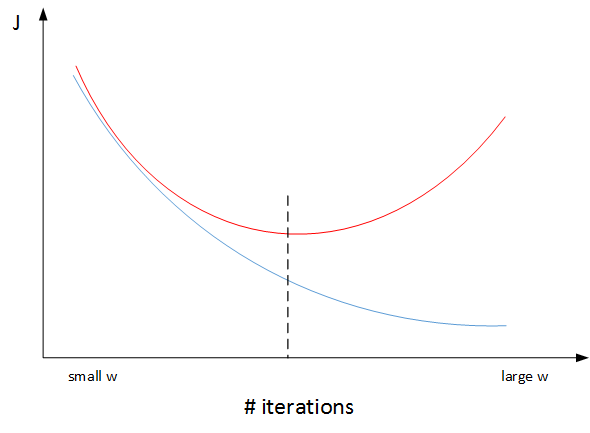

① 然而，Early stopping有其自身缺点。通常来说，机器学习训练模型有两个目标：一是优化cost function，尽量减小J；二是防止过拟合。

② 这两个目标彼此对立的，即减小J的同时可能会造成过拟合，反之亦然。我们把这二者之间的关系称为正交化orthogonalization。

③ 该节课开始部分就讲过，在深度学习中，我们可以同时减小Bias和Variance，构建最佳神经网络模型。

④ 但是，Early stopping的做法通过减少得带训练次数来防止过拟合，这样J就不会足够小。也就是说，early stopping将上述两个目标融合在一起，同时优化，但可能没有“分而治之”的效果好。

① 与early stopping相比，L2 regularization可以实现“分而治之”的效果：迭代训练足够多，减小J，而且也能有效防止过拟合。

② 而L2 regularization的缺点之一是最优的正则化参数λ的选择比较复杂。

③ 对这一点来说，early stopping比较简单。总的来说，L2 regularization更加常用一些。

# 7. 标准化输入

① 在训练神经网络时，标准化输入可以提高训练的速度。标准化输入就是对训练数据集进行归一化的操作，即将原始数据减去其均值μ后，再除以其方差σ^2：

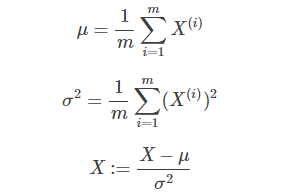

② 以二维平面为例，下图展示了其归一化过程：

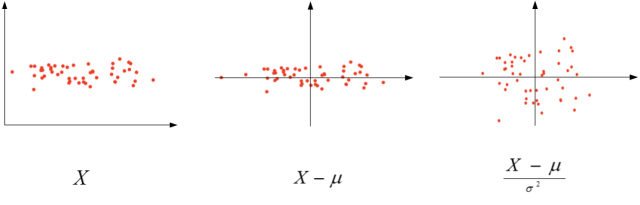

③ 值得注意的是，由于训练集进行了标准化处理，那么对于测试集或在实际应用时，应该使用同样的μ和σ^2对其进行标准化处理。这样保证了训练集合测试集的标准化操作一致。

① 之所以要对输入进行标准化操作，主要是为了让所有输入归一化同样的尺度上，方便进行梯度下降算法时能够更快更准确地找到全局最优解。

② 假如输入特征是二维的，且x1的范围是[1,1000]，x2的范围是[0,1]。如果不进行标准化处理，x1与x2之间分布极不平衡，训练得到的w1和w2也会在数量级上差别很大。

③ 这样导致的结果是cost function与w和b的关系可能是一个非常细长的椭圆形碗。对其进行梯度下降算法时，由于w1和w2数值差异很大，只能选择很小的学习因子α，来避免J发生振荡。

④ 一旦α较大，必然发生振荡，J不再单调下降。如下左图所示。

① 然而，如果进行了标准化操作，x1与x2分布均匀，w1和w2数值差别不大，得到的cost function与w和b的关系是类似圆形碗。

② 对其进行梯度下降算法时，α可以选择相对大一些，且J一般不会发生振荡，保证了J是单调下降的。如下右图所示。

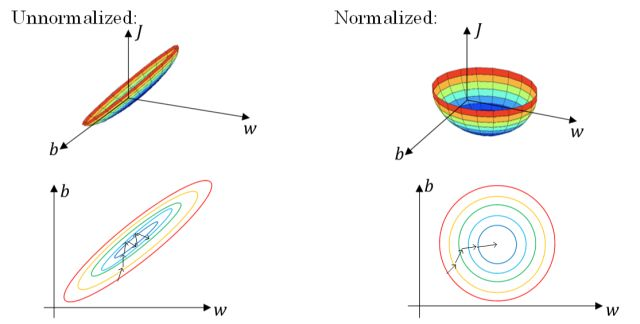

① 另外一种情况，如果输入特征之间的范围本来就比较接近，那么不进行标准化操作也是没有太大影响的。

② 但是，标准化处理在大多数场合下还是值得推荐的。

# 8. 梯度消失和梯度爆炸

① 在神经网络尤其是深度神经网络中存在可能存在这样一个问题：梯度消失和梯度爆炸。

② 意思是当训练一个层数非常多的神经网络时，计算得到的梯度可能非常小或非常大，甚至是指数级别的减小或增大。这样会让训练过程变得非常困难。

① 举个例子来说明，假设一个多层的每层只包含两个神经元的深度神经网络模型，如下图所示：

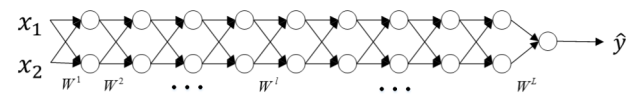

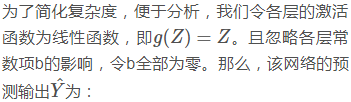

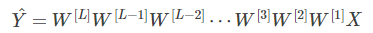

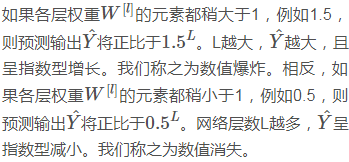

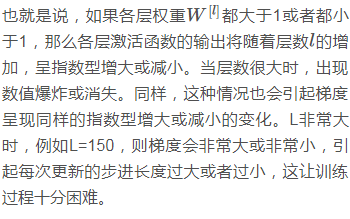

# 9. 深层神经网络权重初始化

① 下面介绍如何改善Vanishing and Exploding gradients这类问题，方法是对权重w进行一些初始化处理。

② 深度神经网络模型中，以单个神经元为例，该层（l）的输入个数为n，其输出为：

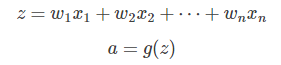

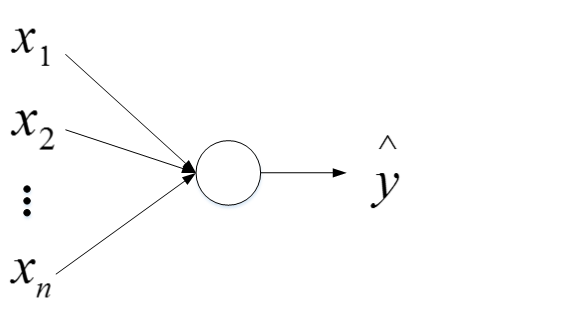

③ 这里忽略了常数项b。为了让z不会过大或者过小，思路是让w与n有关，且n越大，w应该越小才好。这样能够保证z不会过大。一种方法是在初始化w时，令其方差为1/n。相应的python伪代码为：

In [ ]:
w[l] = np.random.randn(n[l],n[l-1])*np.sqrt(1/n[l-1])

④ 如果激活函数是tanh，一般选择上面的初始化方法。

⑤ 如果激活函数是ReLU，权重w的初始化一般令其方差为2/n：

In [ ]:
w[l] = np.random.randn(n[l],n[l-1])*np.sqrt(2/n[l-1])

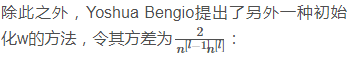

In [ ]:
w[l] = np.random.randn(n[l],n[l-1])*np.sqrt(2/n[l-1]*n[l])

⑥ 至于选择哪种初始化方法因人而异，可以根据不同的激活函数选择不同方法。另外，我们可以对这些初始化方法中设置某些参数，作为超参数，通过验证集进行验证，得到最优参数，来优化神经网络。

# 10. 梯度检查

① Back Propagation神经网络有一项重要的测试是梯度检查（gradient checking）。其目的是检查验证反向传播过程中梯度下降算法是否正确。

② 下面先介绍如何近似求出梯度值。

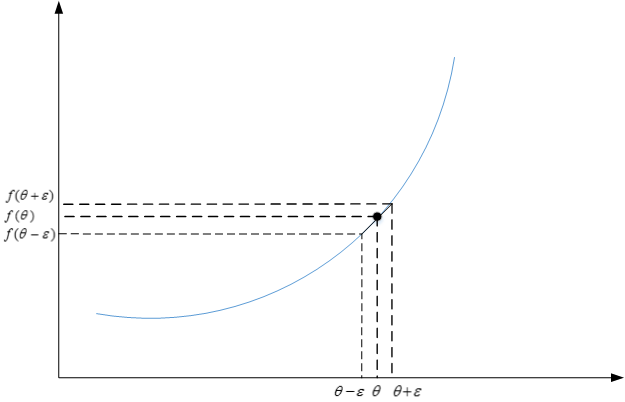

① 利用微分思想，函数f在点θ处的梯度可以表示成：

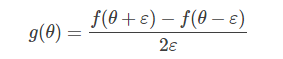

② 其中，ε>0，且足够小。

① 介绍完如何近似求出梯度值后，我们将介绍如何进行梯度检查，来验证训练过程中是否出现bug。

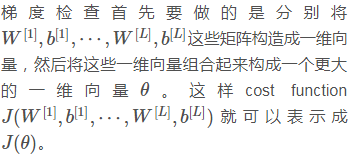

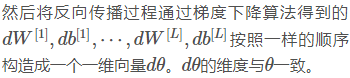

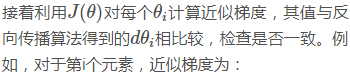

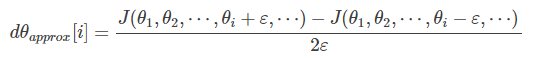

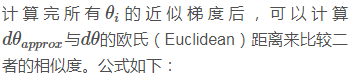

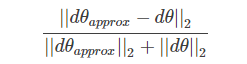

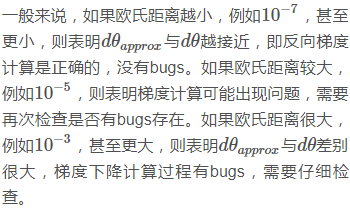

① 在进行梯度检查的过程中有几点需要注意的地方：

 - 不要在整个训练过程中都进行梯度检查，仅仅作为debug使用。

 - 如果梯度检查出现错误，找到对应出错的梯度，检查其推导是否出现错误。

 - 注意不要忽略正则化项，计算近似梯度的时候要包括进去。

 - 梯度检查时关闭dropout，检查完毕后再打开dropout。

 - 随机初始化时运行梯度检查，经过一些训练后再进行梯度检查（不常用）。